In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

#Importing data to test the model later
test = np.genfromtxt('../data/q2/q2test.csv', delimiter=',')
test_x = test[1:,0:2]
test_y = test[1:,2:]

#Number of test cases
no_of_test = test_x.shape[0]

#Adding intercept to test_x
intercept = np.ones(no_of_test).reshape(-1,1)
test_x = np.concatenate((intercept, test_x), axis=1)

#Section 1 Q-2(a)
#Generating Random data points
no_of_points = 1000000

x0 = np.ones(no_of_points).reshape(-1,1)

mu1, sigma1 = 3, math.sqrt(4)
x1 = np.random.normal(mu1, sigma1, no_of_points).reshape(-1,1)

mu2, sigma2 = -1, math.sqrt(4)
x2 = np.random.normal(mu2, sigma2, no_of_points).reshape(-1,1)

#the given value of parameters
theta = np.asarray([[3],[1],[2]])

#generating noise with given parameters
mu, sigma = 0, math.sqrt(2)
eps = np.random.normal(mu,sigma, no_of_points).reshape(-1,1)

train_x = np.c_[x0, x1, x2]

train_y = np.matmul(train_x, theta) + eps

m,n = train_x.shape

In [2]:
#Section 1 Q-2(b)
#Helper Functions

#Cost of a given prediction vector, the corresponding original values and batch size
def cost(pred, train_y, batch_size):
    error = train_y - pred
    error = error*error
    return (np.sum(error)/(2*batch_size))

#Prediction of values given theta and input values
def prediction(theta, x):
    return np.matmul(x,theta)

#Learning model using stochastic gradient descent with a given batch size 'r'  
def learn_model(r):
    theta = np.zeros(3).reshape(-1,1)
    no_of_batches = m//r
    count = 0
    eta = 0.001
    theta_updation = []
    #Storing old value of theta and it is updated in every iteration to check for convergence
    oldtheta = theta
    theta0,theta1,theta2 = [], [], []
    while(1):
        for i in range(no_of_batches):
            for j in range(r):
                k = (i*r) + j
                pred = prediction(theta,train_x[k])
                error = (pred - train_y[k]).reshape(-1,1)
                theta = theta - eta*(((train_x[k].T).reshape(-1,1))*error)
            pred = prediction(theta, train_x[i*r:(i+1)*r])
            batch_y = train_y[i*r:(i+1)*r]
            J = cost(pred, batch_y, r)
            theta_updation.append([i, count, J])
            theta0.append(theta[0][0])
            theta1.append(theta[1][0])
            theta2.append(theta[2][0])
        count = count + 1
        check = oldtheta-theta
        oldtheta = theta
        flag = 0
        for c in check:
            if(abs(c)>0.0001):
                flag = 1
        # Maximum of 5 epochs
        if(flag==0 or count>=5):
            return count, theta, theta_updation, theta0, theta1, theta2
        else:
            eta = eta/2


In [8]:
#Training the model for different batch sizes as given below
batch_size = [1000000, 10000, 100, 1]
learnt_param = []
for r in batch_size:
    start = time.time()
    ans = learn_model(r)
    elapsed = time.time()-start
    print("Done for batch size ", r, ". Time elapsed is", elapsed, ". Theta learnt is")
    print(ans[1])
    learnt_param.append(ans)

Done for batch size  1 . Time elapsed is 99.52097010612488 . Theta learnt is
[[3.01129451]
 [1.0168542 ]
 [1.99710636]]


In [9]:
#Calculating error for different batch sizes
for i in range(4):
    theta_r = learnt_param[i][1]
    batch = batch_size[i] 
    pred = prediction(theta_r, test_x)
    error = cost(pred, test_y, no_of_test)
    print("For batch size ", batch, " error is ", error)

For batch size  1  error is  0.9974710884444786


/home/cs5170415/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


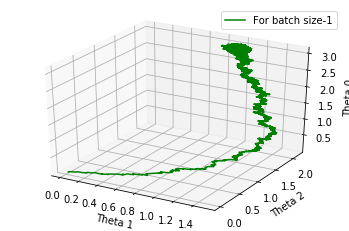

In [10]:
#Q-2(d) plotting the movement of theta for different batch sizes
color = ['green', 'yellow', 'blue', 'red']
for i in range(4):
    updation = learnt_param[i][2]
    theta0, theta1, theta2 = learnt_param[i][3], learnt_param[i][4], learnt_param[i][5]
    fig = plt.figure(i+1)
    ax = plt.axes(projection='3d')
    l = 'For batch size-'+str(batch_size[i])
    ax.set_xlabel('Theta 1')
    ax.set_ylabel('Theta 2')
    ax.set_zlabel('Theta 0')
    ax.plot(theta1, theta2, theta0, c=color[i], label=l)
    ax.legend()
    plt.show()